#### It is good practice to visualize the number of tokens in each language and how long the sentences are.

In [9]:
!pip install -q matplotlib

In [10]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pickle

In [2]:
# count tokens
with open("text_pairs.pickle", "rb") as f:
    text_pairs = pickle.load(f)

In [4]:
text_pairs[0:10]

[('go .', '[start] va  !  [end]'),
 ('hi .', '[start] salut  !  [end]'),
 ('run !', '[start] cours  !  [end]'),
 ('run !', '[start] courez  !  [end]'),
 ('who ?', '[start] qui  ?  [end]'),
 ('wow !', '[start] ça alors  !  [end]'),
 ('fire !', '[start] au feu  !  [end]'),
 ('help !', "[start] à l'aide  !  [end]"),
 ('jump .', '[start] saute . [end]'),
 ('stop !', '[start] ça suffit  !  [end]')]

45

In [6]:
eng_tokens, fra_tokens = set(), set()
eng_maxlen, fra_maxlen = 0, 0

for eng, fra in text_pairs:
    eng_tok, fra_tok = eng.split(), fra.split()
    eng_maxlen = max(eng_maxlen, len(eng_tok))
    fra_maxlen = max(fra_maxlen, len(fra_tok))
    eng_tokens.update(eng_tok)
    fra_tokens.update(fra_tok)
print(f"Total English tokens: {len(eng_tokens)}")
print(f"Total French tokens: {len(fra_tokens)}")
print(f"Max English length: {eng_maxlen}")
print(f"Max French length: {fra_maxlen}")
print(f"{len(text_pairs)} total pairs")
    

Total English tokens: 14969
Total French tokens: 29219
Max English length: 51
Max French length: 60
167130 total pairs


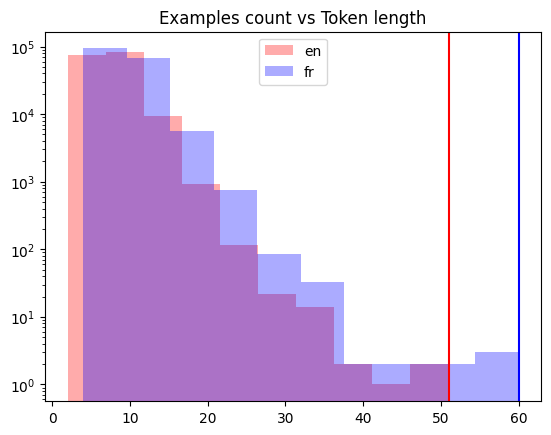

In [11]:
# histogram of sentence length in tokens
en_lengths = [len(eng.split()) for eng, fra in text_pairs]
fr_lengths = [len(fra.split()) for eng, fra in text_pairs]
plt.hist(en_lengths, label="en", color="red", alpha=0.33)
plt.hist(fr_lengths, label="fr", color="blue", alpha=0.33)
plt.yscale("log")     # sentence length fits Benford"s law
plt.ylim(plt.ylim())  # make y-axis consistent for both plots
plt.plot([max(en_lengths), max(en_lengths)], plt.ylim(), color="red")
plt.plot([max(fr_lengths), max(fr_lengths)], plt.ylim(), color="blue")
plt.legend()
plt.title("Examples count vs Token length")
plt.show()